In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [4]:
def generate_parent_table(phenotype_file):
    """
    Organize the sample indices into a table by the pedigree relationship.
    :param phenotype_file: pheno_emaize.txt
    :return: a matrix of sample indices of shape (n_males, n_females)
    """
    import pandas as pd
    import numpy as np
    phenotypes = pd.read_table(phenotype_file)
    pedigree = phenotypes['pedigree'].str.split('_', expand=True)
    pedigree.columns = ['f', 'X', 'm']
    phenotypes = pd.concat([phenotypes, pedigree], axis=1)
    phenotypes['number'] = np.arange(phenotypes.shape[0])
    parent_table = phenotypes.pivot_table(values='number', index=['m'], columns=['f'], dropna=False)
    male_ids = ['m%d' % i for i in range(1, parent_table.shape[0] + 1)]
    female_ids = ['f%d' % i for i in range(1, parent_table.shape[1] + 1)]
    parent_table = parent_table.loc[male_ids, female_ids].values
    return parent_table
parent_table = generate_parent_table('emaize_data/phenotype/pheno_emaize.txt')

/dev/shm/shibinbin/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [5]:
parent_table

array([[   0,    1,    2, ..., 5052, 5053, 5054],
       [ 191,  192,  193, ..., 5057, 5058, 5059],
       [ 380,  381,  382, ..., 5062, 5063, 5064],
       ..., 
       [5509, 5510, 5511, ..., 5627, 5632, 5649],
       [5766, 5767, 5768, ..., 5884, 5889, 5906],
       [5988, 5989, 5990, ..., 6106, 6111, 6128]])

In [6]:
import h5py

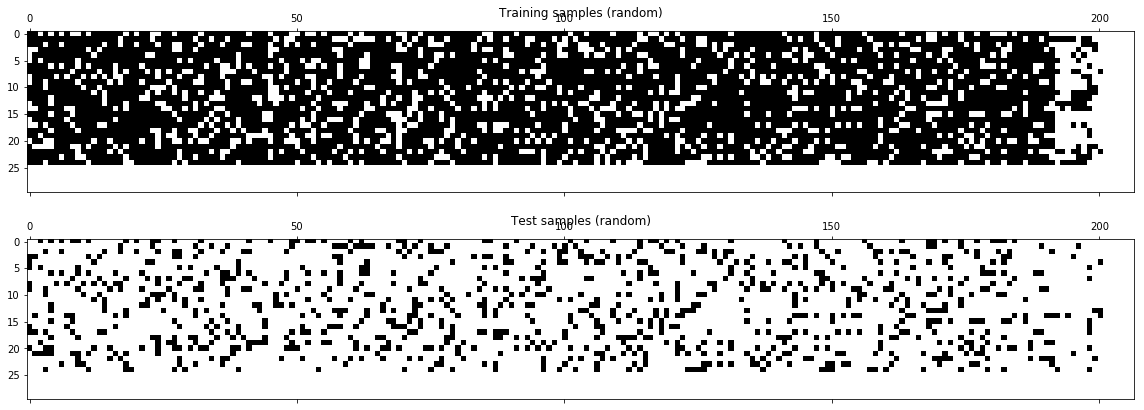

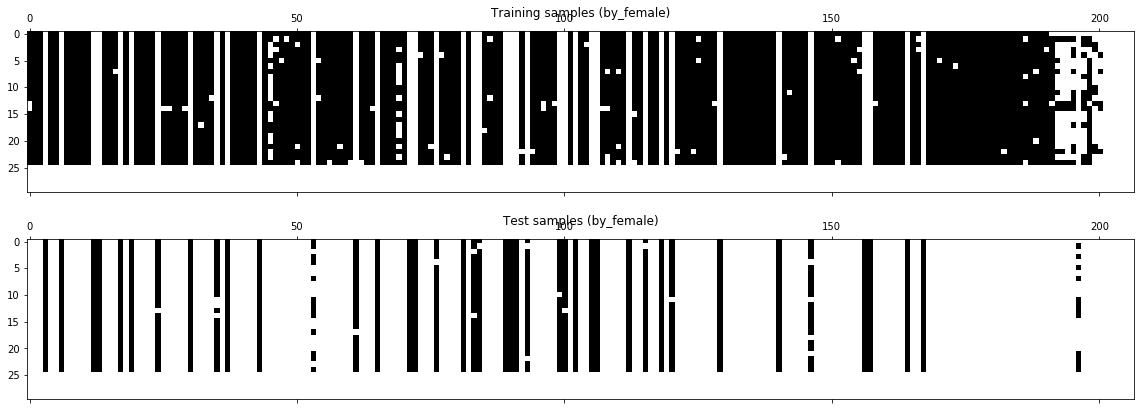

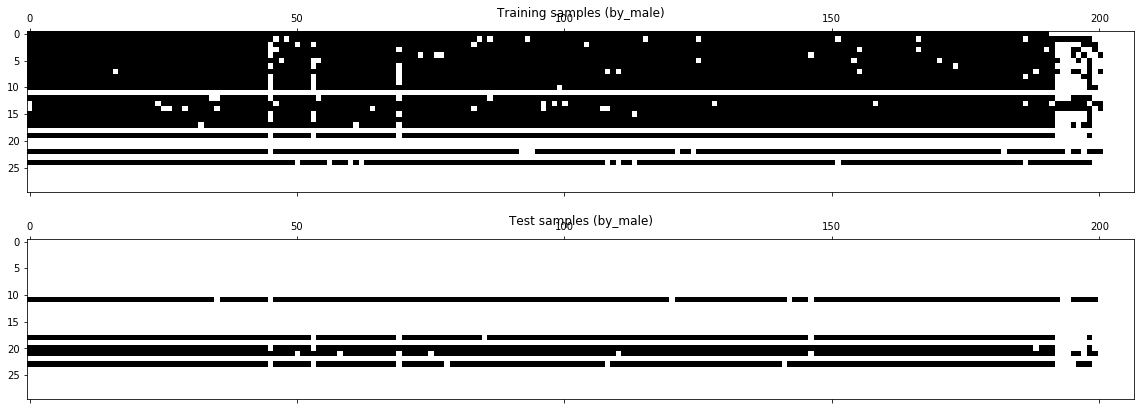

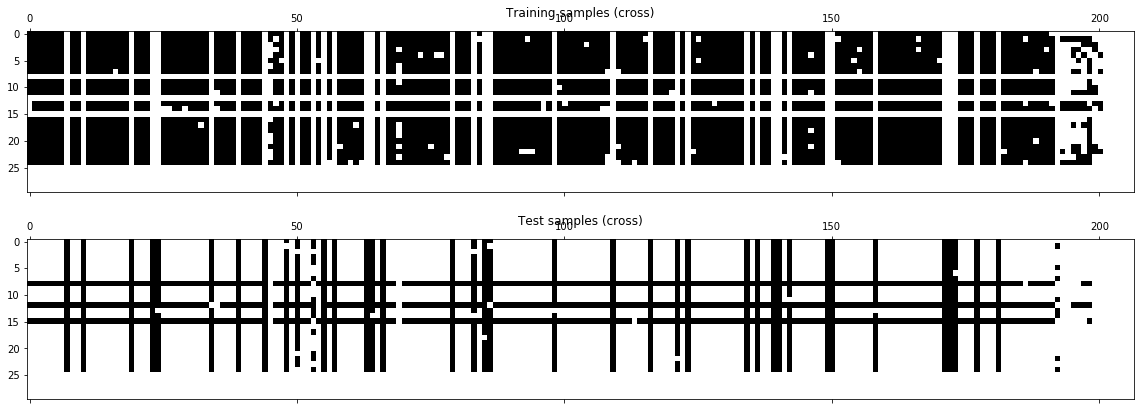

In [17]:
for method in ('random', 'by_female', 'by_male', 'cross'):
    with h5py.File('tmp/cv_index.%s'%method, 'r') as f:
        index_train = f['0/train'][:]
        index_test = f['0/test'][:]
    fig, ax = subplots(2, 1, figsize=(16, 6))
    sampling_table = np.zeros(np.prod(parent_table.shape))
    sampling_table[index_train] = 1
    sampling_table = np.take(sampling_table, parent_table)
    ax[0].matshow(sampling_table, cmap=cm.Greys)
    ax[0].set_title('Training samples (%s)'%method)

    sampling_table = np.zeros(np.prod(parent_table.shape))
    sampling_table[index_test] = 1
    sampling_table = np.take(sampling_table, parent_table)
    ax[1].matshow(sampling_table, cmap=cm.Greys)
    ax[1].set_title('Test samples (%s)'%method)
    plt.tight_layout()